# 1D Harmonic Oscillator Simulation (NVE vs NVT)

## Introduction

In this project, we simulate the dynamics of a 1D harmonic oscillator using the velocity Verlet integration scheme. The harmonic oscillator is governed by a quadratic potential:

$$
V(x) = \frac{1}{2} k x^2
$$

which leads to a restoring force:

$$
F(x) = -kx.
$$

We explore two different simulation conditions:

- **Constant Energy (NVE):** The system evolves under Hamiltonian dynamics where the total energy is conserved (aside from numerical errors).

- **Constant Temperature (NVT):** A thermostat is applied to adjust the velocities and maintain a fixed temperature, thereby controlling the kinetic energy of the system.

## Velocity Verlet Integration

The velocity Verlet algorithm is a popular method in molecular dynamics due to its good energy conservation properties. The update rules are as follows:

1. **Position Update:**

   $$
   x_{n+1} = x_n + v_n \Delta t + \frac{1}{2} a_n \Delta t^2
   $$

2. **Force and Acceleration:**

   The acceleration is calculated using:

   $$
   a_n = \frac{F(x_n)}{m},
   $$

   where we set the mass \( m = 1 \) for simplicity.

3. **Velocity Update:**

   After computing the new acceleration \( a_{n+1} \) at the updated position, the velocity is updated as:

   $$
   v_{n+1} = v_n + \frac{1}{2} (a_n + a_{n+1}) \Delta t.
   $$

## Constant Temperature (NVT) Simulation

In the NVT simulation, we apply a simple thermostat by rescaling the velocities after each time step. The rescaling factor is computed to match the target temperature \( T_{\text{target}} \) using:

$$
\text{scaling factor} = \sqrt{\frac{T_{\text{target}}}{\langle v^2 \rangle}},
$$

where \( \langle v^2 \rangle \) is the mean square velocity of the particles.

## Multiple Trajectories

To demonstrate how different initial conditions affect the dynamics, we simulate multiple trajectories. Each trajectory starts from a distinct initial position \( x_0 \) and velocity \( v_0 \). This helps illustrate how the system evolves in phase space and allows for a comprehensive analysis of the system's response under both NVE and NVT conditions.

## Summary

- **Setup:** We start with several initial conditions \( (x_0, v_0) \) for different trajectories.
- **Integration:** The velocity Verlet method is used to integrate the equations of motion.
- **Thermostat:** In the NVT simulation, velocities are rescaled at each step to maintain the target temperature.
- **Visualization:** Trajectories (position vs. time) are plotted to compare the evolution under constant energy and constant temperature conditions.

This framework not only demonstrates the numerical methods involved but also provides insight into the physics of soft condensed matter systems. The following code cells contain the Python implementations for both simulation types, which you can run and analyze.


### Change the values below for various different results for NVE and NVT

In [1]:
# Define multiple initial conditions: (x0, v0) pairs for different trajectories
initial_conditions = [
    (0.5,  0.0),
    (1.0,  0.5),
    (-1.0, -0.5)
    # (-0.5, 0.2), include/remove as per need
    # (1.5, -0.2)
]

# Simulation parameters
"""Vary the parameters to check more interesting graphs"""
dt = 0.001     # Time step size
n_steps = 30000  # Number of simulation steps
k_value = 8.0 # spring constant

### Here's the code for running the simulations:

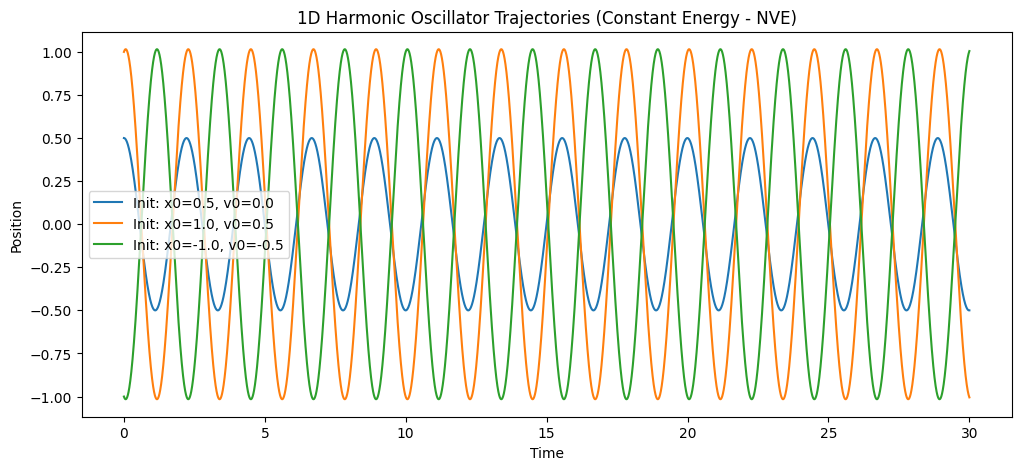

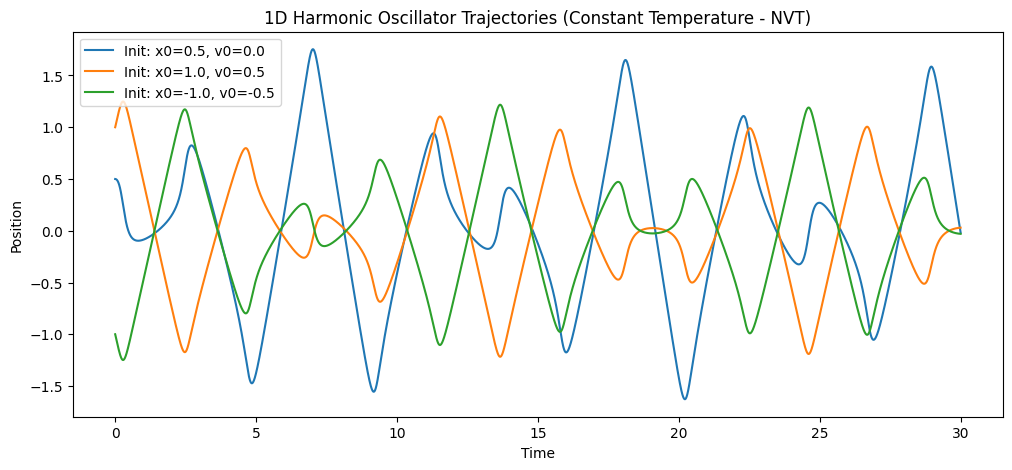

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_force(x, k):
    """Compute the force for a harmonic oscillator."""
    return -k * x

def simulate_harmonic_1d(initial_conditions, dt, n_steps, constant_temperature=False, target_temp=1.0, k=1.0):
    """
    Simulate 1D harmonic oscillator trajectories using the velocity Verlet algorithm.
    
    Parameters:
        initial_conditions (list of tuples): Each tuple is (x0, v0) for a trajectory.
        dt (float): Time step size.
        n_steps (int): Number of simulation steps.
        constant_temperature (bool): If True, apply a velocity-rescaling thermostat (NVT).
        target_temp (float): Target temperature for NVT simulation.
        k (float): Spring constant.
    
    Returns:
        times (np.array): Array of time points.
        traj (np.array): 2D array of shape (n_steps+1, number of trajectories) containing positions.
    """
    num_particles = len(initial_conditions)
    # Initialize positions and velocities from the list of initial conditions
    xs = np.array([ic[0] for ic in initial_conditions])
    vs = np.array([ic[1] for ic in initial_conditions])
    
    # Array to store positions: each column corresponds to a trajectory over time.
    traj = np.zeros((n_steps + 1, num_particles))
    traj[0, :] = xs.copy()
    
    for step in range(n_steps):
        # Compute acceleration for each particle: a = F/m (assuming m = 1)
        a = harmonic_force(xs, k)
        # Position update: x_new = x + v*dt + 0.5*a*dt^2
        xs_new = xs + vs * dt + 0.5 * a * dt**2
        # Compute new acceleration at new positions
        a_new = harmonic_force(xs_new, k)
        # Velocity update: v_new = v + 0.5*(a + a_new)*dt
        vs_new = vs + 0.5 * (a + a_new) * dt
        
        # For constant temperature, rescale velocities to enforce the target temperature.
        if constant_temperature:
            # Compute the mean square velocity over all trajectories
            avg_v2 = np.mean(vs_new**2)
            # Rescale velocities by the same factor
            scaling_factor = np.sqrt(target_temp / (avg_v2 + 1e-8))
            vs_new *= scaling_factor
        
        # Update the state for the next iteration
        xs = xs_new
        vs = vs_new
        
        # Record positions
        traj[step + 1, :] = xs.copy()
    
    times = np.linspace(0, n_steps * dt, n_steps + 1)
    return times, traj


# Run simulation for constant energy (NVE)
times, traj_nve = simulate_harmonic_1d(initial_conditions, dt, n_steps, constant_temperature=False, k=k_value)

# Run simulation for constant temperature (NVT)
times, traj_nvt = simulate_harmonic_1d(initial_conditions, dt, n_steps, constant_temperature=True, target_temp=1.0, k=k_value)

# Plotting the trajectories for the constant energy (NVE) simulation
plt.figure(figsize=(12, 5))
for i, ic in enumerate(initial_conditions):
    plt.plot(times, traj_nve[:, i], label=f'Init: x0={ic[0]}, v0={ic[1]}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('1D Harmonic Oscillator Trajectories (Constant Energy - NVE)')
plt.legend()
plt.show()

# Plotting the trajectories for the constant temperature (NVT) simulation
plt.figure(figsize=(12, 5))
for i, ic in enumerate(initial_conditions):
    plt.plot(times, traj_nvt[:, i], label=f'Init: x0={ic[0]}, v0={ic[1]}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('1D Harmonic Oscillator Trajectories (Constant Temperature - NVT)')
plt.legend()
plt.show()
